# Chapter 03 신경망

__퍼셉트론__
- (+) 복잡한 함수도 표현할 수 있음
- (-) 가중치(w와 b)를 사람이 **수동**으로 설정해야 함 → __신경망__이 해결


__신경망__
- 가중치 매개변수의 적절한 값을 데이터로부터 **자동**으로 학습함

## 3.1 퍼셉트론에서 신경망으로
P.63

### 3.1.1 신경망의 예

<img src="./img/fig 3-1.png" width=500>

- 입력층(Input)
- 출력층(Output)
- 은닉층(Hidden) : 은닉층의 뉴런은 (입력층이나 출력층과 달리) 사람 눈에는 보이지 않는다.

### 3.1.2 퍼셉트론 복습

<img src='./img/fig 3-2.png' width=300>

$$y = 
\begin{cases}
0 \quad (b + w_{1}x_{1} + w_{2}x_{2} \leq 0)\\
1 \quad (b + w_{1}x_{1} + w_{2}x_{2} > 0)
\end{cases}$$

- __b__ : __편향__을 나타내는 매개변수
    - 뉴런이 얼마나 쉽게 활성화되느냐를 제어

- __w$_{i}$__ : __가중치__를 나타내는 매개변수
    - 각 신호의 영향력을 제어

<br>

<img src='./img/fig 3-3.png' width=300>

가중치가 b이고 입력이 1인 뉴런 추가. (편향의 입력 신호는 항상 1)

$$y = h(b + w_{1}x_{1} + w_{2}x_{2})$$<br>
$$h(x) = 
\begin{cases}
0 \quad (x \leq 0)\\
1 \quad (x > 0)
\end{cases}$$
- $h(x)$ 함수 : 입력이 0을 넘으면 1을 돌려주고, 입력이 0을 넘지 않으면 0을 돌려줌

### 3.1.3 활성화 함수의 등장

__활성화 함수__ `h(x)` : 입력 신호의 총합을 출력 신호로 변환하는 함수
- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할

$$a = b + w_{1}x_{1} + w_{2}x_{2}$$<br>
$$y = h(a)$$

<img src='./img/fig 3-4.png' width=300>

※ WARNING_

단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델

다층 퍼셉트론 : 신경망

## 3.2 활성화 함수
P.68

__계단 함수__ : 임계값을 경계로 출력이 바뀌는 함수
- 퍼셉트론은 활성화 함수로 쓸 수 있는 여러 후보 중에서 계단 함수를 채용
- **활성화 함수를 계단 함수에서 다른 함수로 변경**하는 것이 신경망의 키포인트

### 3.2.1 시그모이드 함수

__시그모이드 함수__
- 신경망에서 자주 이용하는 활성화 함수

$$ h(x) = \frac{1}{1 + exp(-x)} $$

### 3.2.2 계단 함수 구현하기

In [9]:
# 넘파이 배열 지원하는 계단 함수 만들기
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [10]:
# x라는 넘파이 배열 생성
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [11]:
# 넘파이 배열에 부등호 연산을 수행하면 bool 배열이 생성됨.
y = x > 0
y

array([False,  True,  True])

In [12]:
# 배열 y의 원소를 bool에서 int형으로 바꿔줌.
y = y.astype(np.int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

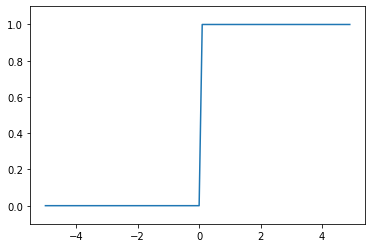

In [13]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)  # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀜.

### 3.2.4 시그모이드 함수 구현하기

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

인수 x가 넘파이 배열이어도 올바른 결과가 나옴. (넘파이의 브로드캐스트 기능)

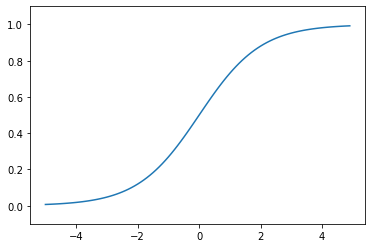

In [15]:
x = np.arange(-5.0, 5.0, 0.1)  # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

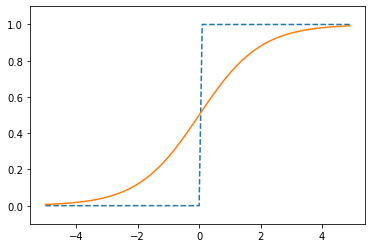

In [16]:
x = np.arange(-5.0, 5.0, 0.1)  # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

**차이점**
- 시그모이드 함수 : 부드러운 곡선. 출력이 실수(연속적).
- 계단 함수 : 0을 경계로 출력이 갑자기 바뀜. 0과 1 중 하나의 값만.

**공통점**
- 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워짐

### 3.2.6 비선형 함수

__선형 함수__ : 입력했을 때 출력이 입력의 상수배만큼 변하는 함수. 곧은 1개의 직선. ($f(x) = ax + b$)

__비선형 함수__ : 직선 1개로는 그릴 수 없는 함수.

>계단 함수와 시그모이드 함수는 모두 **비선형 함수**

* 신경망에서는 활성화 함수로 __비선형 함수를 사용해야 함.__

    * 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어짐.<br>
        (선형 함수로는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있음)

### 3.2.7 ReLU 함수

__ReLU__ (Rectified Linear Unit, 렐루) 함수 : 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수
- 신경망에서 최근에 주로 이용하는 활성화 함수

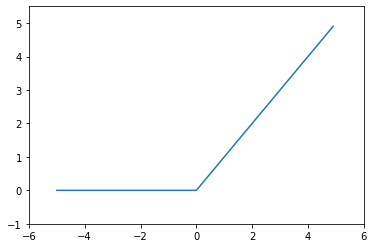

In [17]:
def relu(x):
    return np.maximum(0, x)  # maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

x = np.arange(-5.0, 5.0, 0.1)  # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-1, 5.5)  # y축의 범위 지정
plt.show()

## 3.3 다차원 배열의 계산
P.77

### 3.3.1 다차원 배열

__다차원 배열__ : 숫자를 N차원으로 나열하는 것

In [18]:
# 1차원 배열 A
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [19]:
# 배열의 차원 수 확인
np.ndim(A)

1

In [20]:
# 배열의 형상 확인
A.shape  # 튜플 반환

(4,)

In [21]:
A.shape[0]

4

In [22]:
# 2차원 배열 B
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [23]:
np.ndim(B)

2

In [24]:
B.shape

(3, 2)

$$\begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix}$$

- 행렬(matrix) : 2차원 배열
- 행(row) : 가로 방향
- 열(column) : 세로 방향

### 3.3.2 행렬의 곱

왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산함. 새로운 다차원 배열의 원소가 됨.


`np.dot()`
- 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산.

In [25]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [26]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [27]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [28]:
# 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 다름
np.dot(B, A)

array([[23, 34],
       [31, 46]])

In [29]:
# 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함.
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [30]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [31]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [32]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [33]:
B = np.array([7,8])
B.shape

(2,)

In [34]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

넘파이 행렬을 써서 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망 구현.

<img src='./img/fig 3-14.png' width=600>

In [35]:
X = np.array([1,2])
X.shape

(2,)

In [36]:
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

[[1 3 5]
 [2 4 6]]
(2, 3)


In [37]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기
P.83

입력부터 출력까지의 처리(순방향 처리) 3층 신경망 구현.
- 넘파이의 다차원 배열 사용

<img src='./img/fig 3-15.png' width=600>

### 3.4.1 표기법 설명

<img src='./img/fig 3-16.png' width=600>

### 3.4.2 각 층의 신호 전달 구현하기

#### 입력층에서 1층으로의 신호 전달

<img src='./img/fig 3-17.png' width=600>

- 편향을 뜻하는 뉴런인 ①이 추가됨.
- 편향은 오른쪽 아래 인덱스가 하나밖에 없음.

<img src='./img/e 3.8.png' width=210>

<img src='./img/e 3.9.png' width=150>

$$A = \begin{pmatrix} a_1^{(1)} & a_2^{(1)} & a_3^{(1)} \end{pmatrix}, X = \begin{pmatrix} x_1 & x_2 \end{pmatrix}, B = \begin{pmatrix} b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \end{pmatrix}$$<br>
$$W^{(1)} = \begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \end{pmatrix}$$

In [38]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [39]:
A1 = np.dot(X, W1) + B1

#### 1층의 활성화 함수에서의 처리

<img src='./img/fig 3-18.png' width=600>

- 활성화 함수로 시그모이드 함수 사용

In [40]:
Z1 = sigmoid(A1)  # 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열 반환

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### 1층에서 2층으로의 신호 전달

<img src='./img/fig 3-19.png' width=600>

In [41]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [42]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

#### 2층에서 출력층으로의 신호 전달

<img src='./img/fig 3-20.png' width=600>

- 활성화 함수만 앞의 은닉층과 다름.

In [43]:
# 앞의 흐름과 통일하기 위해 항등 함수 정의
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # 혹은 Y = A3

※ NOTE_

__출력층의 활성화 함수__

- 회귀 - 항등 함수
- 2클래스 분류 - 시그모이드 함수
- 다중 클래스 분류 - 소프트맥스 함수

### 3.4.3 구현 정리


__함수 정의__

1. init_network() 함수
    - 가중치와 편향을 초기화
    - 딕셔너리 변수인 network에 매개변수(가중치와 편향) 저장
    
    
2. forword() 함수
    - 입력 신호를 출력으로 변환
    - 순방향(입력에서 출력 방향)

In [44]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
P.90

신경망은 분류와 회귀 모두에 이용할 수 있음. 단, 활성화 함수가 다름.

- 회귀 - 항등 함수
- 분류 - 소프트맥스 함수

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

__항등 함수__

- 입력을 그대로 출력

<img src='./img/fig 3-21.png' width=150>

<br>

__소프트맥스 함수__

$$y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^n exp(a_i)}$$

- n : 출력층의 뉴런 수 / $y_k$ : k번째 출력
- 출력층의 각 뉴런이 모든 입력 신호의 영향을 받음. (분모가 모든 입력 신호의 지수 함수의 합으로 구성됨.)

<img src='./img/fig 3-22.png' width=150>

- 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받음.

In [45]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)  # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)  # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [46]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

컴퓨터는 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없음. → **오버플로**

>소프트맥스의 지수 함수를 계산할 때 __어떤 정수를 더해도 (혹은 빼도) 결과가 바뀌지 않는다__는 것을 이용해 문제 해결

<img src='./img/e 3.11.png' width=300>

- C'으로 일반적으로 입력 신호 중 최댓값을 이용함. (최댓값을 빼줌)

In [47]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산

<ipython-input-47-a1e496ec493a>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산
<ipython-input-47-a1e496ec493a>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산


array([nan, nan, nan])

⇒ 제대로 계산되지 않는다.

In [48]:
c = np.max(a)  # c = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [49]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [50]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징

In [51]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [52]:
np.sum(y)

1.0

1. 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수
2. 소프트맥스 함수의 출력의 총합은 1
>출력을 __'확률'__로 해석할 수 있음.
3. 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음.
>신경망으로 분류할 때는 __출력층의 소프트맥스 함수를 생략__해도 됨.

※ NOTE_

- 추론(test) - 출력층의 소프트맥스 함수를 생략
- 학습(train) - 출력층에서 소프트맥스 함수를 사용 (4장 참고)

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함.

    e.g. 분류 - 분류하고 싶은 클래스 수로 설정

<img src='./img/fig 3-23.png' width=500>

- 가장 큰 값을 출력하는 뉴런($y_2$)을 선택함.

## 3.6 손글씨 숫자 인식
P.96

__손글씨 숫자 분류__
- 이미 학습된 매개변수를 사용 (학습 과정 생략)
- 추론 과정(=순전파)만 구현

<br>

※ NOTE_

신경망의 두 단계
1. 학습 단계 : 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수 학습
2. 추론 단계 : 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류

### 3.6.1 MNIST 데이터셋

__MNIST 데이터셋__ : 손글씨 숫자 이미지 집합
- 0~9의 숫자 이미지로 구성
- 훈련 이미지가 60,000장, 시험 이미지가 10,000장

<img src='./img/fig 3-24.png' width=400>

__MNIST의 이미지 데이터__
- $28 \times 28$ 크기의 회색조 이미지(1채널)
- 각 픽셀은 0~255의 값을 취함
- 각 이미지에는 그 이미지가 실제 의미하는 숫자가 레이블로 붙어있음

`mnist.py` MNIST 데이터셋을 내려받아 이미지를 넘파이 배열로 변환해줌

`load_mnist()`

인수
- normalize (_bool_) : 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지
    - False : 0~255 사이의 값 유지
- flatten (_bool_) : 1차원 배열로 만들지
    - False : $1 \times 28 \times 28$의 3차원 배열
    - True : 784개의 원소로 이뤄진 1차원 배열
- one_hot_label (_bool_) : 원-핫 인코딩 형태로 저장할지
    - False : 숫자 형태의 레이블을 저장 (e.g. '2')
    - True : 원-핫 인코딩하여 저장 (e.g. [0,0,1,0,0,0,0,0,0,0])
    
반환
- MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)" 형식으로 반환

※ NOTE_

__pickle__ : 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능. 실행 당시의 객체를 즉시 복원할 수 있음.
- dataframe을 pickle 파일로 저장하기 : df.to_pickle("data.pkl")
- pickle 파일을 dataframe으로 불러오기 : df = pd.read_pickle("data.pkl")

In [53]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist  # dataset/mnist.py의 load_mnist 함수를 임포트

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


__MNIST 이미지를 화면으로 불러오기__

`PIL(Python Image Library) 모듈` : 이미지 표시

In [64]:
import numpy as np
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))  # Image.fromarray() : 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환
    pil_img.show()

# flatten=True로 설정해 1차원 넘파이 배열로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)  # 원래 이미지의 모양(28 X 28 크기)으로 변경
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

- 입력층 뉴런 - 784개 ($28 \times 28$)
- 출력층 뉴런 - 10개 (0~9의 숫자)
- 은닉층 두 개
    - 첫 번째 은닉층 - 50개의 뉴런 (임의의 값)
    - 두 번째 은닉층 - 100개의 뉴런 (임의의 값)

In [55]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    
    return x_test, t_test

def init_network():
    # sample_weight.pkl 파일에 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음.
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

__정확도(accuracy) 평가__

In [56]:
x, t = get_data()  # x: x_test, t: t_test
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])  # 각 레이블의 확률을 넘파이 배열로 반환. e.g. [0.1, 0.3, 0.2, ..., 0.04]
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스(예측 결과)를 얻는다.
    if p == t[i]:  # 신경망이 예측한 답변과 정답 레이블을 비교.
        accuracy_cnt += 1
        
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))  # 맞힌 숫자(accuracy_cnt)를 전체 이미지 숫자로 나눔.

Accuracy:0.9352


__정규화(normalization)__ : 데이터를 특정 범위로 변환

__전처리(preprocessing)__ : 신경망의 입력 데이터에 특정 변환을 가하는 것

> 여기에서는 입력 이미지 데이터에 대한 __전처리__ 작업으로 __정규화__를 수행한 셈.

### 3.6.3 배치 처리

다차원 배열의 대응하는 차원의 원소 수가 일치함.

In [58]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


__이미지 데이터를 1장만 입력했을 때__
<img src='./img/fig 3-26.png' width=500>
- 원소가 784개인 1차원 배열이 입력
- 원소가 10개인 1차원 배열이 출력

<br>

__이미지 100개를 묶어서 입력했을 때__
<img src='./img/fig 3-27.png' width=500>
- 입력 : $100 \times 784$
- 출력 : $100 \times 10$
>100장 분량 입력 데이터의 결과가 한 번에 출력됨

<br>

⇒ __배치(batch)__ : 하나로 묶은 입력 데이터

※ NOTE_

배치 처리는 컴퓨터로 계산할 때 큰 이점을 줌

(컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠름)

In [60]:
x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # range(start, end, step)
    x_batch = x[i:i+batch_size]  # 앞에서부터 batch_size만큼씩 묶어서 꺼냄.
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)  # axis=1: 100X10의 배열 중 1번째 차원을 구성하는 원소에서 최댓값의 인덱스
    accuracy_cnt += np.sum(p == t[i:i+batch_size])  # True가 몇 개인지 계산.
    
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [61]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [63]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
print(np.sum(y==t))

[ True  True False  True]
3


데이터를 배치로 처리함으로써 효율적이고 빠르게 처리할 수 있음.